## Supervised Learning with ScikitLearn
### Datacamp
## Fine Tuning the Model

### Classification metrics
We can use accuracy, the fraction of correctly classified labels, to measure model performance. However, accuracy is not always a useful metric.

### Class imbalance
Let's consider a model for predicting whether a bank transaction is fraudulent, where only 1% of transactions are actually fraudulent. We could build a model that classifies every transaction as legitimate; this model would have an accuracy of 99%! However, it does a terrible job of actually predicting fraud, so it fails at its original purpose. The situation where one class is more frequent is called class imbalance. Here, the class of legitimate transactions contains way more instances than the class of fraudulent transactions. This is a common situation in practice and requires a different approach to assessing the model's performance.

## Confusion matrix for assessing classification performance
Given a binary classifier, such as our fraudulent transactions example, we can create a 2-by-2 matrix that summarizes performance called a confusion matrix.

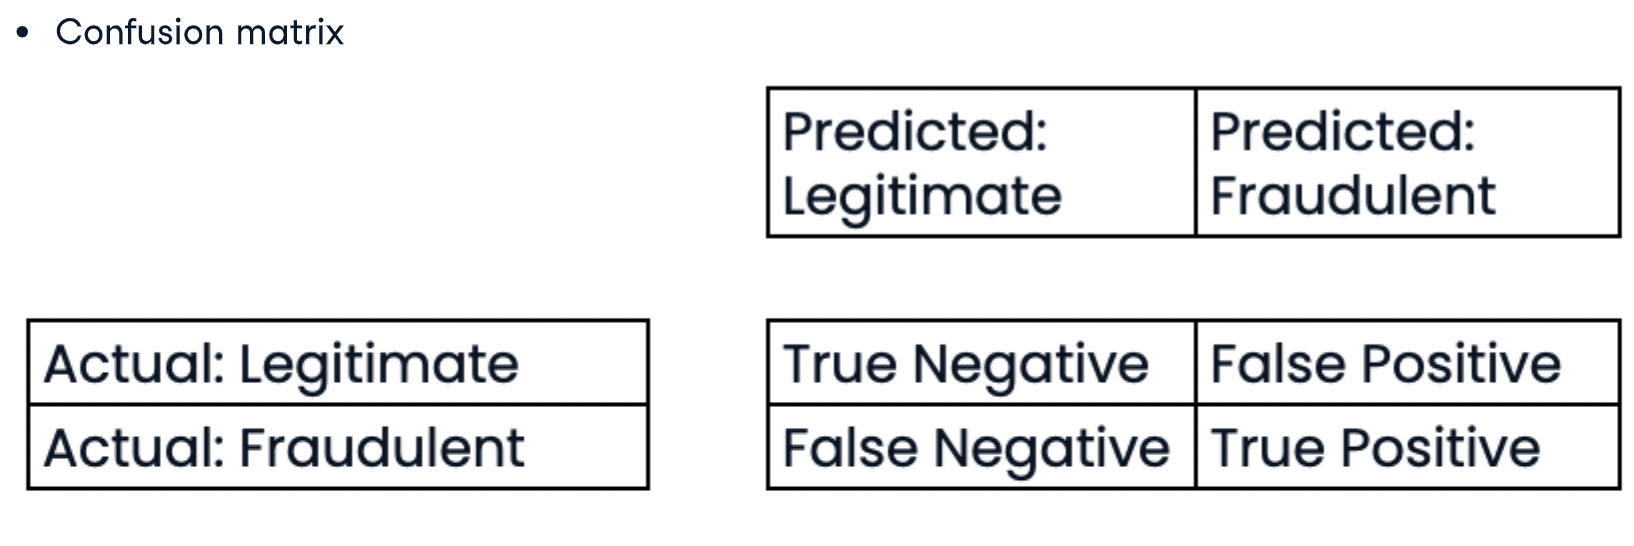

- The <strong>true positives</strong> are the number of fraudulent transactions correctly labeled;
- The <strong>true negatives</strong> are the number of legitimate transactions correctly labeled;
- The <strong>false negatives</strong> are the number of legitimate transactions incorrectly labeled;
- And the <strong>false positives</strong> are the number of transactions incorrectly labeled as fraudulent.

Usually, the class of interest is called the <strong>positive class</strong>. As we aim to detect fraud, the positive class is an illegitimate transaction. 

**Why is the confusion matrix important?**

## Accuracy

Firstly, we can retrieve **accuracy**: it's the sum of true predictions divided by the total sum of the matrix.

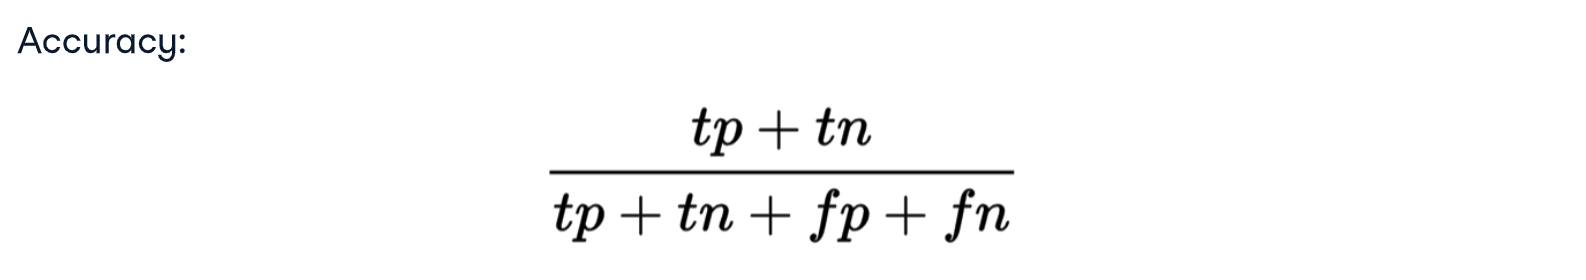

## Precision
Secondly, there are other important metrics we can calculate from the confusion matrix. 

**Precision** is the number of true positives divided by the sum of all positive predictions. It is also called the **positive predictive value**. 

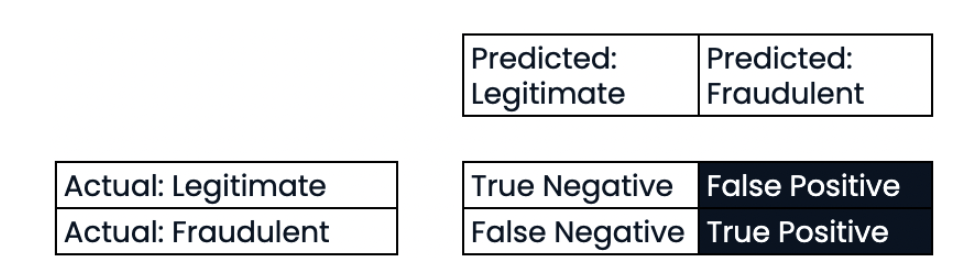

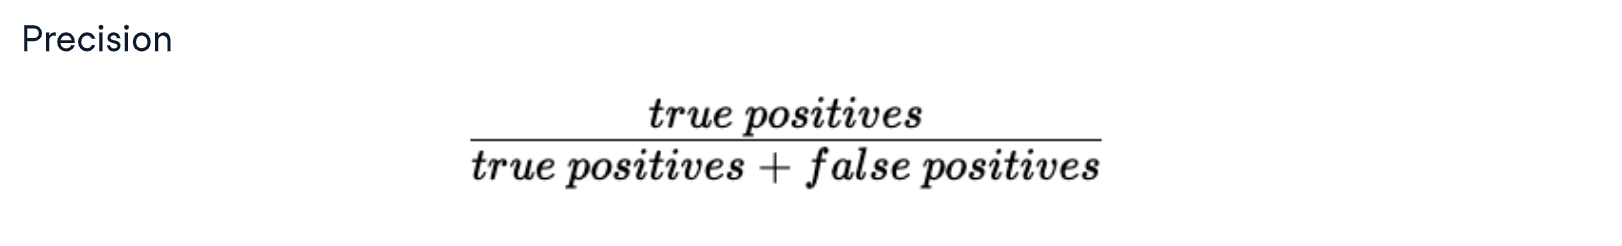

- High precision = lower false positive rate

In our case, this is the number of correctly labeled fraudulent transactions divided by the total number of transactions classified as fraudulent. High precision means having a lower false positive rate. For our classifier, this translates to fewer legitimate transactions being classified as fraudulent.

## Recall
**Recall** is the number of true positives divided by the sum of true positives and false negatives. This is also called **sensitivity**. 

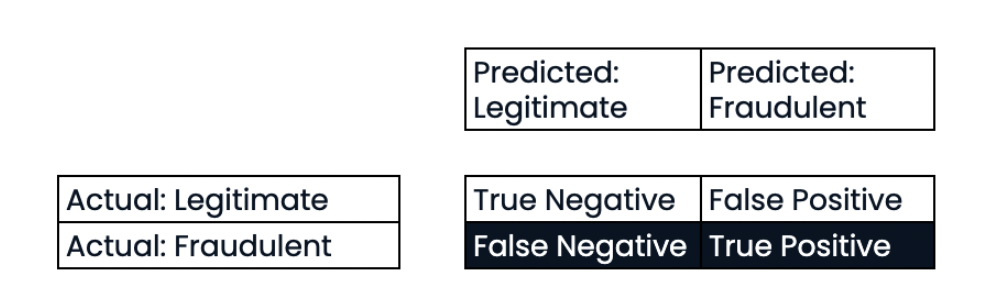

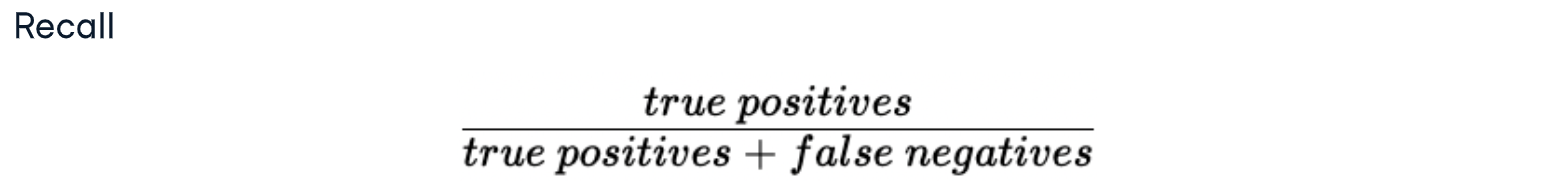

- High recall = lower false negative rate

High recall reflects a lower false negative rate. For our classifier, it means predicting most fraudulent transactions correctly.

##  F1 score
The **F1-score** is the harmonic mean of precision and recall.

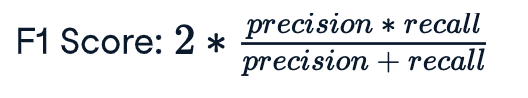

This metric gives equal weight to precision and recall, therefore it factors in both the number of errors made by the model and the type of errors. The F1 score favors models with similar precision and recall, and is a useful metric if we are seeking a model which performs reasonably well across both metrics.

In [6]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
churn_df = pd.read_csv("telecom_churn_clean.csv")

In [16]:
churn_df.columns

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [17]:
del churn_df['Unnamed: 0']

In [18]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

In [20]:
knn = KNeighborsClassifier(n_neighbors = 7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

We pass the test set labels and the predicted labels to the confusion matrix function. 

In [21]:
print(confusion_matrix(y_test, y_pred))

[[1126   12]
 [ 158   38]]


We can see 1126 true negatives in the top left.

Passing the same arguments to classification report outputs all the relevant metrics. 

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1138
           1       0.76      0.19      0.31       196

    accuracy                           0.87      1334
   macro avg       0.82      0.59      0.62      1334
weighted avg       0.86      0.87      0.84      1334



 It includes precision and recall by class, 0.76 and 0.19 for the churn class respectively, which highlights how poorly the model's recall is on the churn class. Support represents the number of instances for each class within the true labels.

## Deciding on a primary metric
- A model predicting the presence of cancer as the positive class. : 

    This model should minimize the number of false negatives, so recall is a more appropriate metric.
    
- A classifier predicting the positive class of a computer program containing malware. :
    
    To avoid installing malware, false negatives should be minimized, hence recall or F1-score are better metrics for this model.
    
- A model predicting if a customer is a high-value lead for a sales team with limited capacity. : 

    With limited capacity, the sales team needs the model to return the highest proportion of true positives compared to all predicted positives, thus minimizing wasted effort. So, precision is the best metric for this. 
    
    


## Assessing a diabetes prediction classifier

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

We will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

In [24]:
diabetes_df = pd.read_csv("../regression/diabetes_clean.csv")

In [26]:
diabetes_df

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0              6      148         72       35        0  33.6  0.627   50   
1              1       85         66       29        0  26.6  0.351   31   
2              8      183         64        0        0  23.3  0.672   32   
3              1       89         66       23       94  28.1  0.167   21   
4              0      137         40       35      168  43.1  2.288   33   
..           ...      ...        ...      ...      ...   ...    ...  ...   
763           10      101         76       48      180  32.9  0.171   63   
764            2      122         70       27        0  36.8  0.340   27   
765            5      121         72       23      112  26.2  0.245   30   
766            1      126         60        0        0  30.1  0.349   47   
767            1       93         70       31        0  30.4  0.315   23   

     diabetes  
0           1  
1           0  
2           1  
3           0  
4           1  
..        ...  
763         0  
764         0  
765         0  
766         1  
767         0  

[768 rows x 9 columns]

In [32]:
diabetes_df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [33]:
X = diabetes_df.drop(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 
       'dpf', 'diabetes'], axis = 1).values
y = diabetes_df["diabetes"].values

In [34]:
X

array([[33.6, 50. ],
       [26.6, 31. ],
       [23.3, 32. ],
       ...,
       [26.2, 30. ],
       [30.1, 47. ],
       [30.4, 23. ]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

- Import confusion_matrix and classification_report.
- Fit the model to the training data.
- Predict the labels of the test set, storing the results as y_pred.
- Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

In [36]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[117  34]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.60       231
weighted avg       0.64      0.65      0.64       231



The model produced 33 true positives and 34 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Logistic regression and the ROC curve

### Logistic regression for binary classification

Despite its name, logistic regression is used for classification. This model calculates the probability, p, that an observation belongs to a binary class. Using our diabetes dataset as an example, if p is more than or equal to zero-point-five, we label the data as one, representing a prediction that an individual is more likely to have diabetes; if p is less than zero-point-five, we label it zero to represent that they are more likely to not have diabetes.

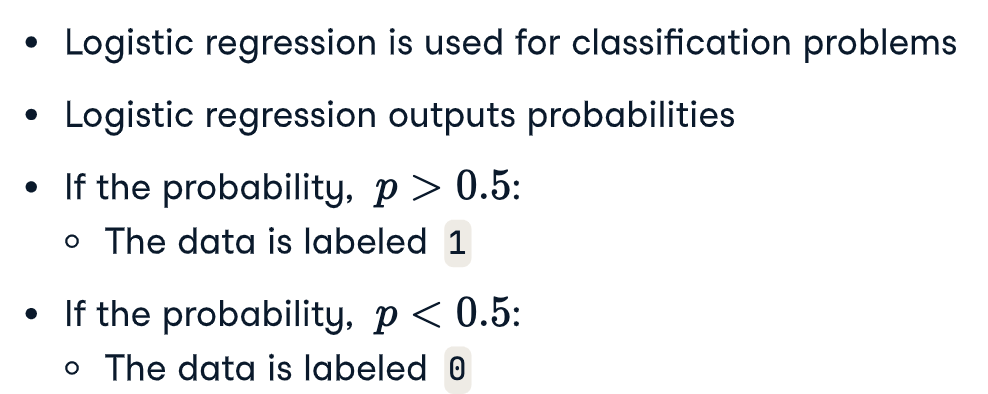

### Linear decision boundary
Logistic regression produces a linear decision boundary, as we can see in this image.

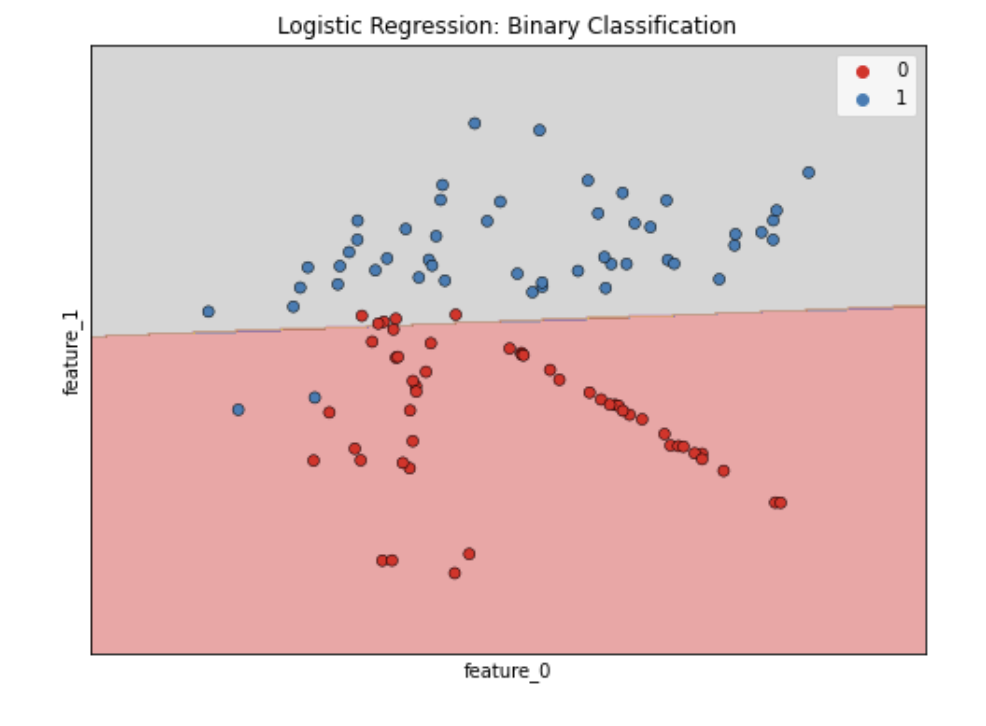

In [37]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

- We first import LogisticRegression from sklearn-dot-linear_model. 
- Next we instantiate the classifier, split our data, 
- fit the model on our training data, and 
- predict on our test set.

## Predicting probabilities



In [41]:
logreg.predict_proba(X_test)

array([[0.88732362, 0.11267638],
       [0.96931036, 0.03068964],
       [0.84381202, 0.15618798],
       ...,
       [0.90914856, 0.09085144],
       [0.89367503, 0.10632497],
       [0.96954797, 0.03045203]])

In [44]:
y_pred_probs = logreg.predict_proba(X_test)[:,1]

We can predict probabilities of each instance belonging to a class by calling logistic regression's predict_proba method and passing the test features. This returns a 2-dimensional array with probabilities for both classes, in this case, that the individual did not churn, or did churn, respectively. We slice the second column, representing the positive class probabilities, and store the results as y_pred_probs. 

In [45]:
y_pred_probs[0]

0.11267637629517029

Here we see the model predicts a probability of 0.11 that the first observation has churned.

## Probability thresholds
The default probability threshold for logistic regression in scikit-learn is 0.5. This threshold can also apply to other models such as KNN. So what happens as we vary this threshold?

### The ROC curve
We can use a receiver operating characteristic, or ROC curve, to visualize how different thresholds affect true positive and false positive rates.

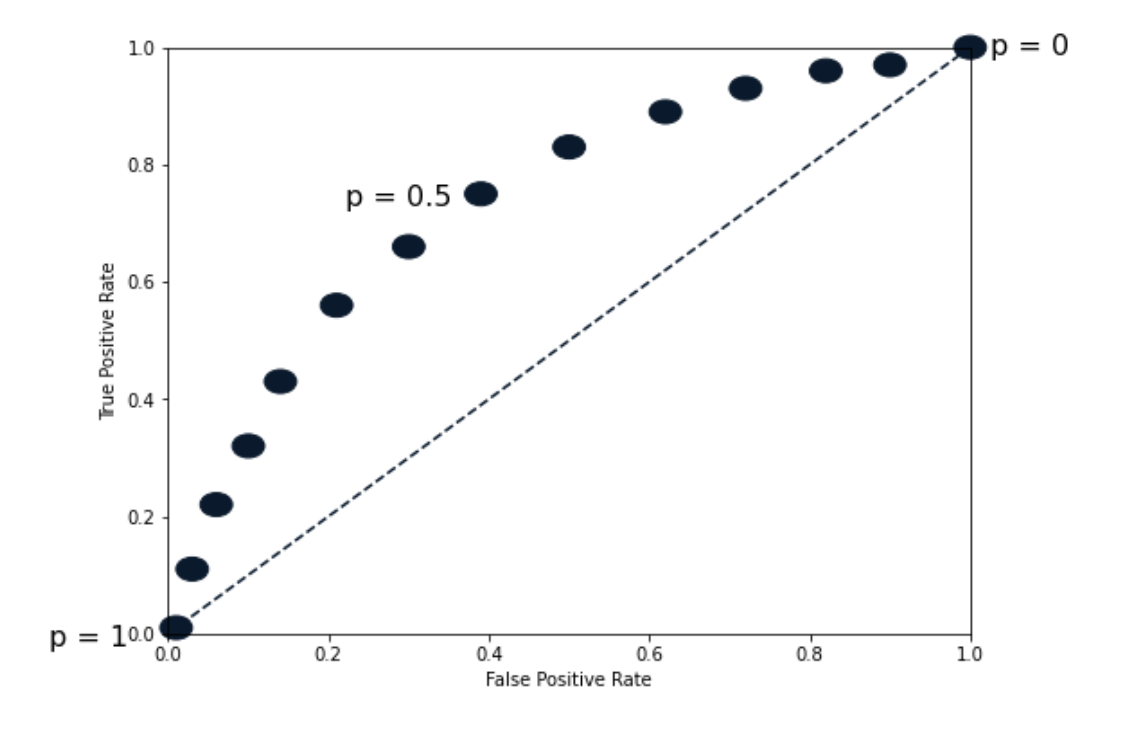

- Here, the dotted line represents a chance model, which randomly guesses labels.
- When the threshold equals zero, the model predicts one for all observations, meaning it will correctly predict all positive values, and incorrectly predict all negative values.
- If the threshold equals one, the model predicts zero for all data, which means that both true and false positive rates are zero.
- If we vary the threshold, we get a series of different false positive and true positive rates.

- A line plot of the thresholds helps to visualize the trend.
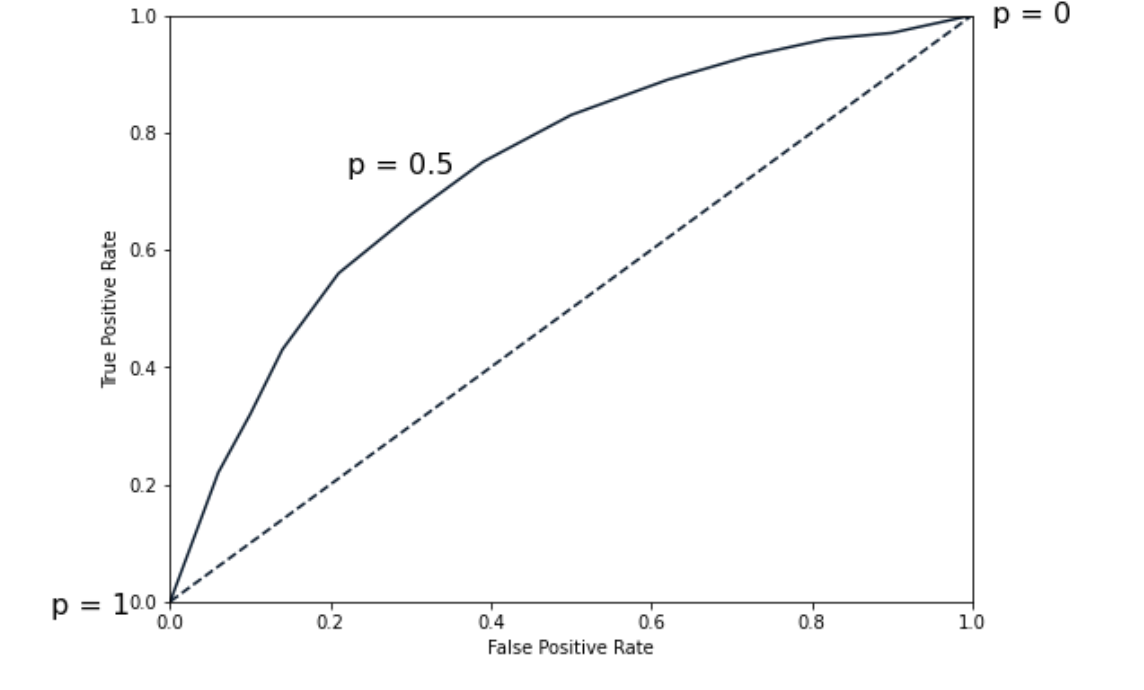

## Plotting the ROC curve

In [49]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

To plot the ROC curve, we import roc_curve from sklearn-dot-metrics. 
- We then call the function roc_curve; we pass the test labels as the first argument, and the predicted probabilities as the second. 
- We unpack the results into three variables: false positive rate, fpr; true positive rate, tpr; and the thresholds. 
- We can then plot a dotted line from zero to one, along with the fpr and tpr;

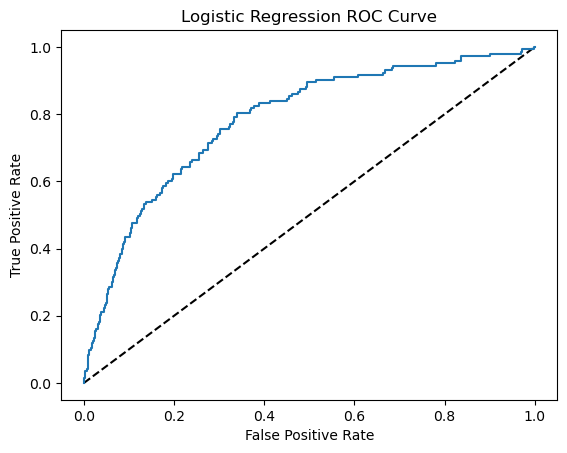

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

 This looks great, but how do we quantify the model's performance based on this plot?

## ROC AUC

If we have a model with one for true positive rate and zero for false positive rate, this would be the perfect model. Therefore, we calculate the area under the ROC curve, a metric known as AUC. Scores range from zero to one, with one being ideal.

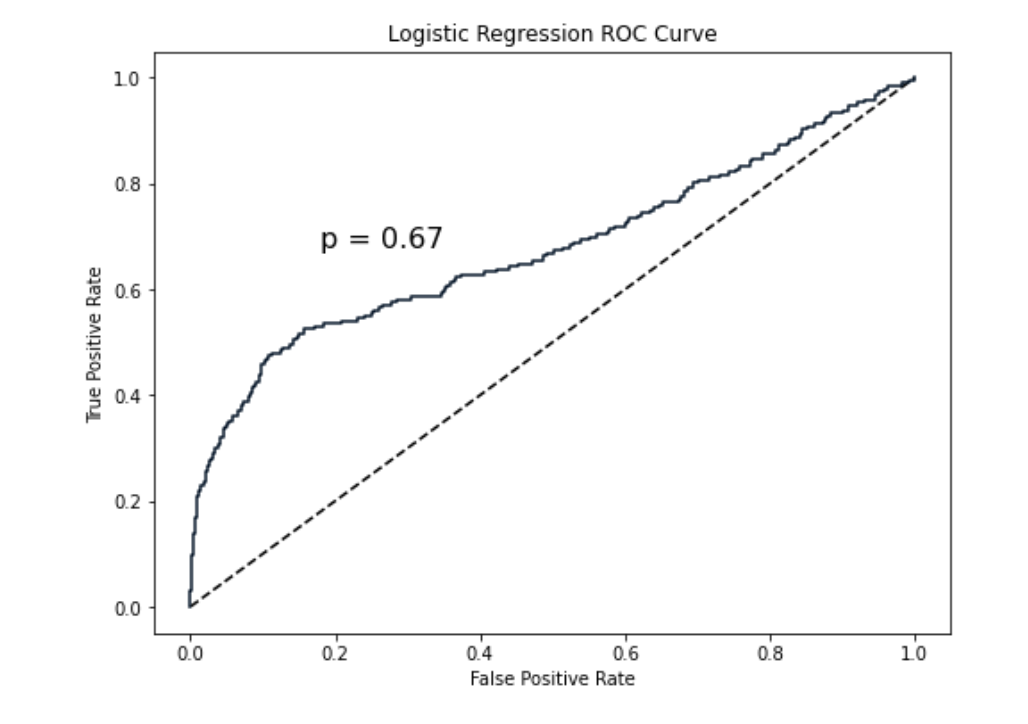

 Here, the model scores 0.67, which is only 34% better than a model making random guesses.


In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
print(roc_auc_score(y_test, y_pred_probs))

0.7827353509967281


## Building a logistic regression model on Diabetes dataset

We will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

In [53]:
diabetes_df

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0              6      148         72       35        0  33.6  0.627   50   
1              1       85         66       29        0  26.6  0.351   31   
2              8      183         64        0        0  23.3  0.672   32   
3              1       89         66       23       94  28.1  0.167   21   
4              0      137         40       35      168  43.1  2.288   33   
..           ...      ...        ...      ...      ...   ...    ...  ...   
763           10      101         76       48      180  32.9  0.171   63   
764            2      122         70       27        0  36.8  0.340   27   
765            5      121         72       23      112  26.2  0.245   30   
766            1      126         60        0        0  30.1  0.349   47   
767            1       93         70       31        0  30.4  0.315   23   

     diabetes  
0           1  
1           0  
2           1  
3           0  
4           1  
..        ...  
763         0  
764         0  
765         0  
766         1  
767         0  

[768 rows x 9 columns]

In [54]:
X = diabetes_df.drop(['diabetes'], axis = 1).values
y = diabetes_df["diabetes"].values

In [55]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

- Import LogisticRegression.
- Instantiate a logistic regression model, logreg.
- Fit the model to the training data.
- Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.

In [57]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26551026 0.18336584 0.12119623 0.15613546 0.49611239 0.44582216
 0.01359241 0.61646111 0.55640539 0.79311829]


The probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.

## The ROC curve
Now we have built a logistic regression model for predicting diabetes status, we can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

We will create a ROC curve and then interpret the results.

- Import roc_curve.
- Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
- Plot true positive rate against false positive rate.

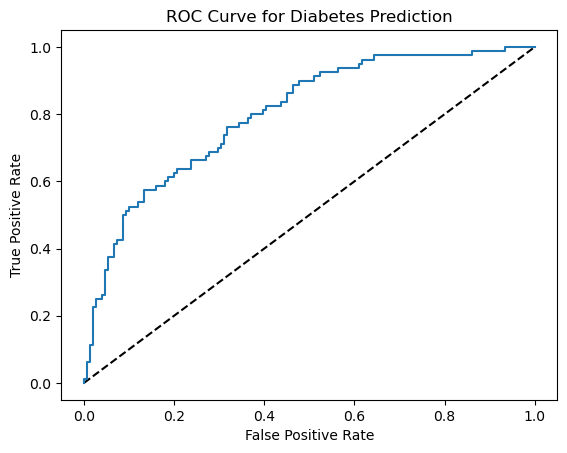

In [58]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The model is much better than randomly guessing the class of each observation.

The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

## ROC AUC
The ROC curve we plotted looked promising.

Now we will compute the area under the ROC curve, along with the other classification metrics.

In [76]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
# Predict the labels of the test data: y_pred
y_pred = logreg.predict(X_test)


print("logistic regression")
print(roc_auc_score(y_test, y_pred_probs))
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

logistic regression
0.8002483443708608
[[121  30]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



A knn model has also been created and the performance metrics printed in the console, so we can compare the roc_auc_score, confusion_matrix, and classification_report between the two models.

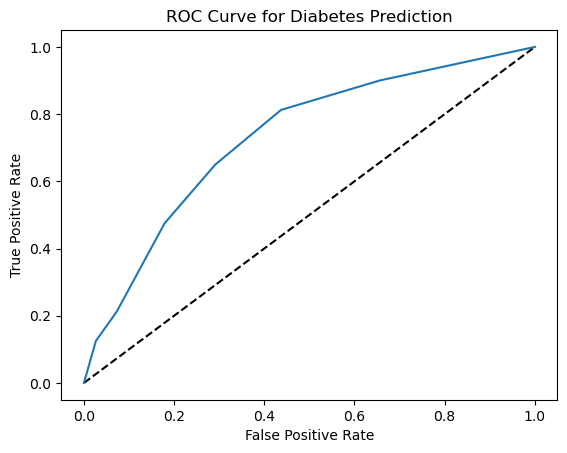

In [78]:
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)
# Predict probabilities
y_pred_probs = knn.predict_proba(X_test)[:, 1]
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)


# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

- Import roc_auc_score.
- Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
- Calculate and print the confusion matrix.
- Call classification_report().

In [79]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

print("knn")

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

knn
0.7300496688741722
[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



Logistic regression performs better than the KNN model across all the metrics we calculated. A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.

## Hyperparameter tuning

We had to choose a value for alpha in ridge and lasso regression before fitting it. Likewise, before fitting and predicting KNN, we choose n_neighbors. Parameters that we specify before fitting a model, like alpha and n_neighbors, are called hyperparameters. So, a fundamental step for building a successful model is choosing the correct hyperparameters.

##  Choosing the correct hyperparameters

1. We can try lots of different values
2. Fit all of them separately
3. See how well they perform, and 
4. Choose the best values! 

This is called **hyperparameter tuning**. 

When fitting different hyperparameter values, 
- we use cross-validation to avoid overfitting the hyperparameters to the test set. 
- We can still split the data and perform cross-validation on the training set. 
- We withhold the test set and use it for evaluating the tuned model.

## Grid search cross-validation

One approach for hyperparameter tuning is called **grid search**, where we choose a grid of possible hyperparameter values to try. For example, we can search across two hyperparameters for a KNN model - the type of metric and different number of neighbors. 

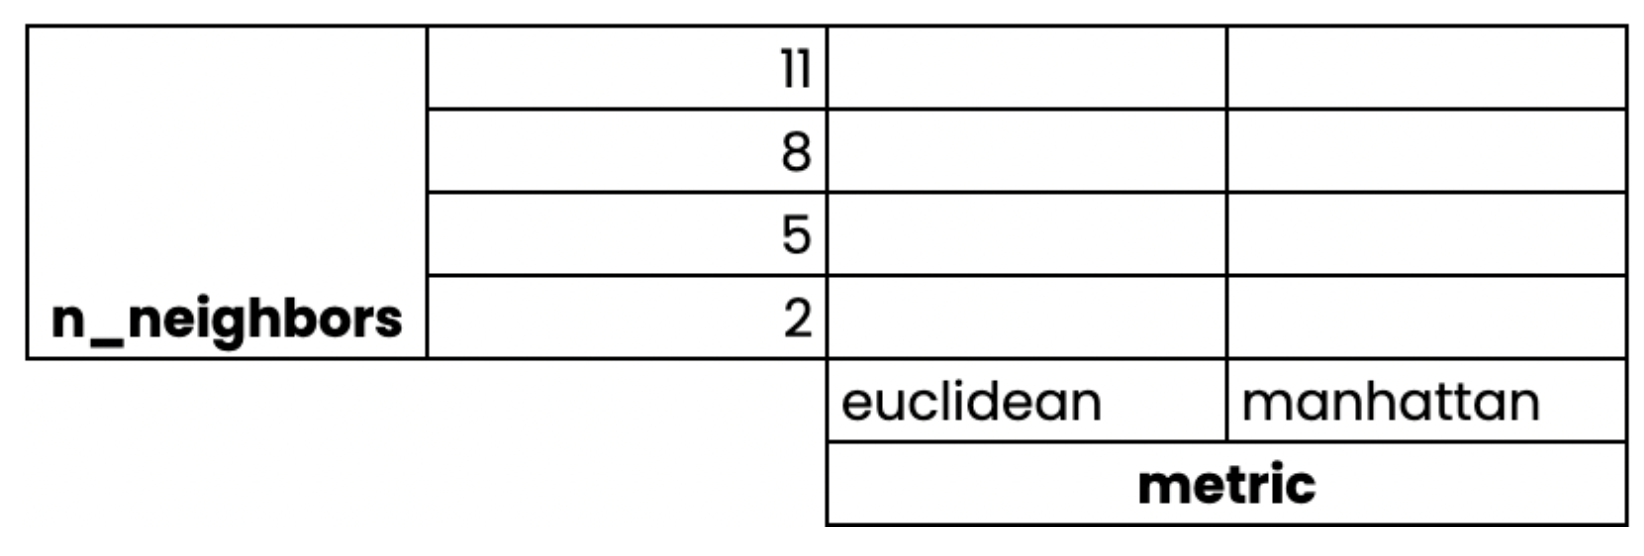

Here we have n neighbors between two and eleven in increments of three, and two metrics: euclidean and manhattan. Therefore, we can create a grid of values like this.

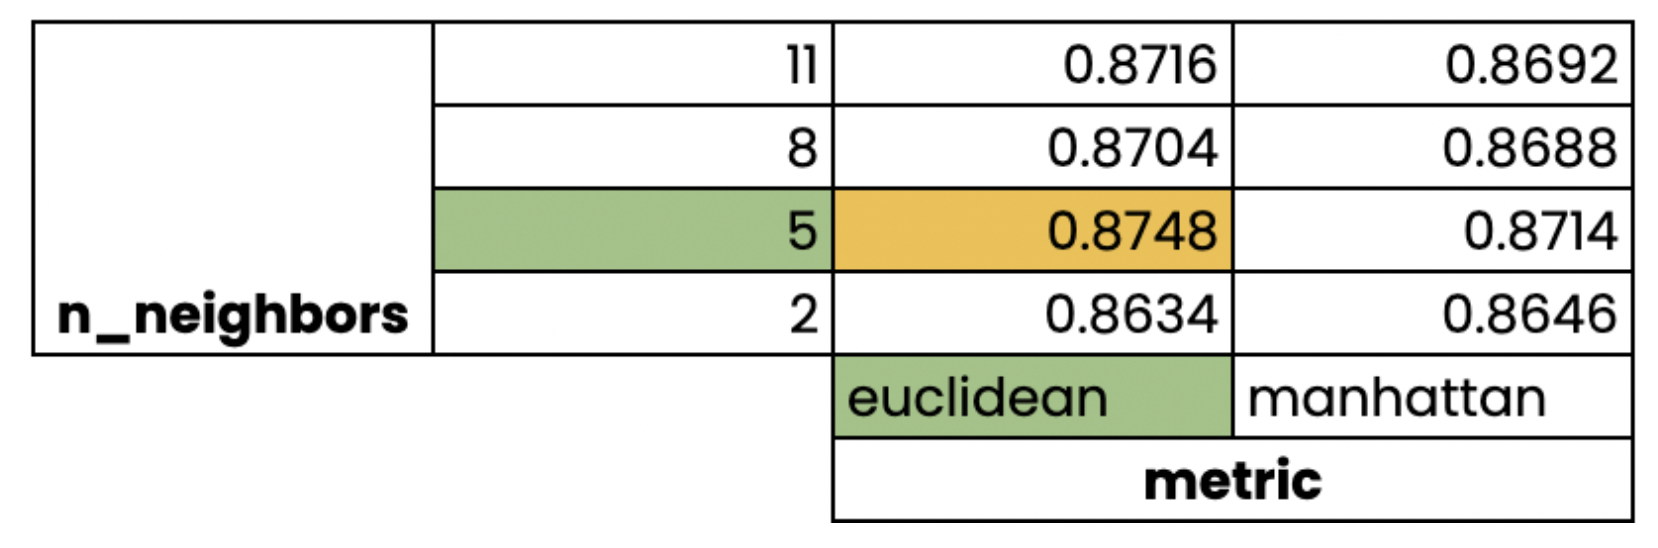

We perform k-fold cross-validation for each combination of hyperparameters. The mean scores for each combination are shown here. We then choose hyperparameters that performed best, as shown here.

## GridSearchCV on Sales Dataset

Let's perform a grid search on a regression model using our sales dataset. 



In [82]:
import numpy as np

In [88]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

In [95]:
churn_df.drop("churn", axis=1)

account_length  area_code  international_plan  voice_mail_plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             192        415                   0                1   
3329              68        415                   0                0   
3330              28        510                   0                0   
3331             184        510                   1                0   
3332              74        415                   0                1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3329                 9.6              

In [89]:
from sklearn.model_selection import GridSearchCV , KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

param_grid = {"alpha": np.arange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv = kf)
ridge_cv.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([0.0001]), 'solver': ['sag', 'lsqr']})

- We import GridSearchCV from sklearn-dot-model_selection. 
- We instantiate KFold. 
- We then specify the names and values of the hyperparameters we wish to tune as the keys and values of a dictionary, param_grid. 
- As always, we instantiate our model. 
- We then call GridSearchCV and pass it our model, the grid we wish to tune over and set cv equal to kf. 
- This returns a GridSearch object that we can then fit to the training data, and this fit performs the actual cross-validated grid search. 


- We can then print the model's attributes to retrieve the hyperparameters that perform the best along with the mean cross-validation score over that fold.



In [90]:
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sag'} 0.1662974329556473


## Limitations and an alternative approach

Grid search is great. However, the number of fits is equal to the number of hyperparameters multiplied by the number of values multiplied by the number of folds. Therefore, it doesn't scale well! So, performing 3-fold cross-validation for one hyperparameter with 10 values each means 30 fits, while 10-fold cross-validation on 3 hyperparameters with 10 values each equals 900 fits!

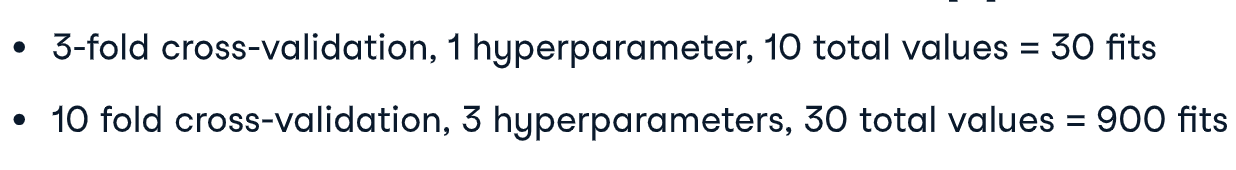

However, there is another way.


## RandomizedSearchCV

We can perform a random search, which picks random hyperparameter values rather than exhaustively searching through all options. Let's demonstrate this approach.

In [92]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
param_grid = { 'alpha' : np.arange(0.0001, 1, 10),
             'solver' : ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv = kf, n_iter = 2)
ridge_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Ridge(), n_iter=2,
                   param_distributions={'alpha': array([0.0001]),
                                        'solver': ['sag', 'lsqr']})

- We import RandomizedSearchCV from sklearn-dot-model_selection. 
- We set up KFold and param_grid, and instantiate the model. 
- We call RandomizedSearchCV using the same arguments and variables as GridSearchCV. We can optionally set the n_iter argument, which determines the number of hyperparameter values tested. So five-fold cross-validation with n_iter set to two performs 10 fits. 


- Again we can access the best hyperparameters and their score. In this case it is able to find the best hyperparameters from our previous grid search!

In [93]:
print(ridge_cv.best_params_,ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.0001} 0.16630993894644272


## Evaluating on the test set

We can evaluate model performance on the test set by passing it to a call of the random search object's dot-score method.

In [97]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.16896589881325508


 It actually performs slightly better than the best score in our grid search!

## Hyperparameter tuning with GridSearchCV on diabetes dataset

Now we have seen how to perform grid search hyperparameter tuning, we are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

- Import GridSearchCV.
- Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
- Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
- Fit the grid search object to the training data to perform a cross-validated grid search.




In [99]:
X = diabetes_df.drop(['diabetes'], axis = 1).values
y = diabetes_df["diabetes"].values

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

In [100]:
from sklearn.model_selection import GridSearchCV , KFold
from sklearn.linear_model import Lasso


kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

lasso = Lasso()
# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)

print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.29604708033272714


Unfortunately, the best model only has an R-squared score of 0.29, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

## Hyperparameter tuning with RandomizedSearchCV
As we saw, GridSearchCV can be computationally expensive, especially if we are searching over a large hyperparameter space. In this case, we can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

We will define a range of hyperparameters and use RandomizedSearchCV to look for optimal hyperparameters from these options.

- Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
- Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
- Fit logreg_cv to the training data.
- Print the model's best parameters and accuracy score.

In [101]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()



In [102]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.8571571428571428, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.963265306122449}
Tuned Logistic Regression Best Accuracy Score: 0.757822776047075


Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets